In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install warnings
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


1.**Loding data**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Database/Pre_Processed_AAPL.csv")


In [ ]:
data.head()
data.tail()

,Date,Open,High,Low,Close,Adj. Close,Volume
1544,2021-02-22,128.01,129.72,125.60,126.00,126.00,103607600.0
1545,2021-02-23,123.76,126.71,118.39,125.86,125.86,157859100.0
1546,2021-02-24,124.94,125.56,122.23,125.35,125.35,110691500.0
1547,2021-02-25,124.68,126.46,120.54,120.99,120.99,147306500.0
1548,2021-02-26,122.59,124.85,121.20,121.26,121.26,164320000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1549 non-null   object 
 1   Open        1549 non-null   float64
 2   High        1549 non-null   float64
 3   Low         1549 non-null   float64
 4   Close       1549 non-null   float64
 5   Adj. Close  1549 non-null   float64
 6   Volume      1549 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.8+ KB


**2**.**Spliting Data as Train and Validation**

In [ ]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1549
Train data length : 1084
Validation data lenth : 465


In [ ]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2015-01-02,27.85
1,2015-01-05,27.07
2,2015-01-06,26.64
3,2015-01-07,26.80
4,2015-01-08,27.31
...,...,...
1079,2019-04-17,49.88
1080,2019-04-18,50.78
1081,2019-04-22,50.71
1082,2019-04-23,51.11


In [ ]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1084,2019-04-25,51.71
1085,2019-04-26,51.22
1086,2019-04-29,51.10
1087,2019-04-30,50.76
1088,2019-05-01,52.47
...,...,...
1544,2021-02-22,128.01
1545,2021-02-23,123.76
1546,2021-02-24,124.94
1547,2021-02-25,124.68


**3.Creating Train Dataset from Train split**

In [ ]:
dataset_train = train_data.Open.values
dataset_train.shape

(1084,)

In [ ]:


# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1084, 1)



**4.Normalization / Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1084, 1)

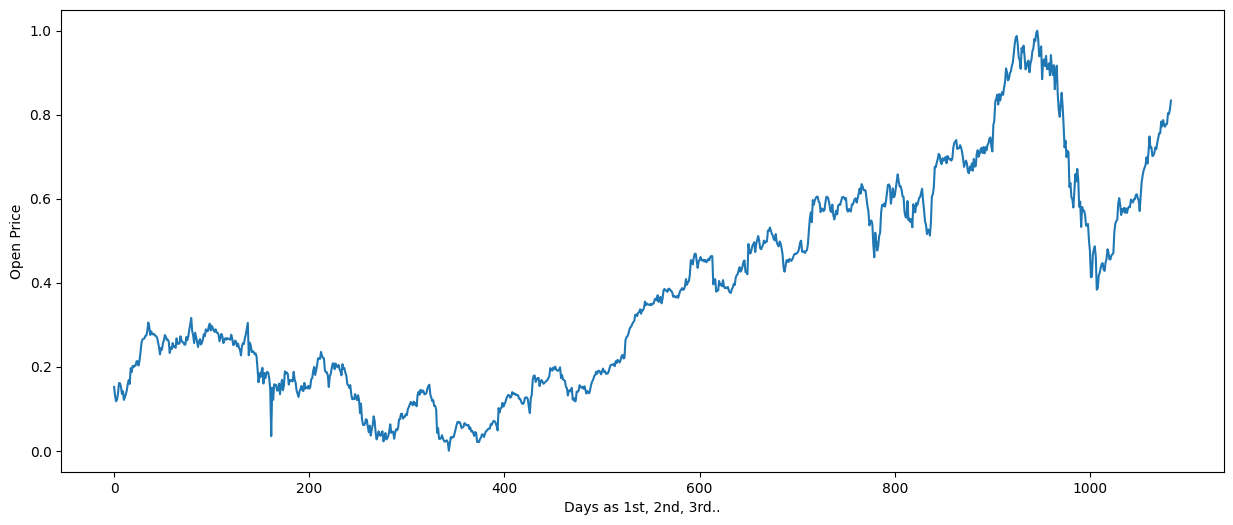

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

**Creating X_train and y_train from Train data**

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

            # convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1034, 50)
Shape of y_train before reshape : (1034,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1034, 50, 1)
Shape of y_train after reshape : (1034, 1)


In [ ]:
X_train[0]

array([[0.15203183],
       [0.12986644],
       [0.11764706],
       [0.12219381],
       [0.13668656],
       [0.16112532],
       [0.16055698],
       [0.152316  ],
       [0.1352657 ],
       [0.14208582],
       [0.12105712],
       [0.12674055],
       [0.13469736],
       [0.14407502],
       [0.15856777],
       [0.16851378],
       [0.15913612],
       [0.1963626 ],
       [0.18698494],
       [0.20176186],
       [0.19920432],
       [0.20261438],
       [0.20261438],
       [0.21312873],
       [0.21312873],
       [0.20289855],
       [0.21426542],
       [0.23273657],
       [0.25603865],
       [0.26484797],
       [0.26626883],
       [0.26740551],
       [0.27337312],
       [0.27422563],
       [0.28445581],
       [0.30520034],
       [0.29525433],
       [0.27564649],
       [0.28417164],
       [0.27877238],
       [0.27678318],
       [0.27791986],
       [0.27422563],
       [0.27280477],
       [0.26967889],
       [0.25859619],
       [0.24694515],
       [0.229

In [ ]:
y_train[0]

array([0.25518613])

**6.Creating RNN model**

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
              )

regressor.add(
              Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
              SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
              )

regressor.add(
              Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
              SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
              )

regressor.add(
              Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
              SimpleRNN(units = 50)
                       )

regressor.add(
             Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
                 optimizer = "adam",
                 loss = "mean_squared_error",
                 metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
33/33 [==============================] - 5s 44ms/step - loss: 0.3925 - accuracy: 9.6712e-04
Epoch 2/50
33/33 [==============================] - 1s 45ms/step - loss: 0.2906 - accuracy: 0.0019
Epoch 3/50
33/33 [==============================] - 1s 45ms/step - loss: 0.2082 - accuracy: 9.6712e-04
Epoch 4/50
33/33 [==============================] - 2s 58ms/step - loss: 0.1508 - accuracy: 0.0019
Epoch 5/50
33/33 [==============================] - 3s 80ms/step - loss: 0.1080 - accuracy: 0.0019
Epoch 6/50
33/33 [==============================] - 1s 44ms/step - loss: 0.1031 - accuracy: 0.0019
Epoch 7/50
33/33 [==============================] - 1s 44ms/step - loss: 0.0802 - accuracy: 0.0019
Epoch 8/50
33/33 [==============================] - 1s 44ms/step - loss: 0.0674 - accuracy: 0.0019
Epoch 9/50
33/33 [==============================] - 1s 44ms/step - loss: 0.0631 - accuracy: 0.0019
Epoch 10/50
33/33 [==============================] - 1s 44ms/step - loss: 0.0496 - accuracy: 0.0019
E

**7.Evaluating Model**

In [ ]:
history.history["loss"]

[0.39251959323883057,
 0.2905954420566559,
 0.20819003880023956,
 0.15075412392616272,
 0.10801010578870773,
 0.1031351312994957,
 0.08019310981035233,
 0.06737957894802094,
 0.06312736123800278,
 0.049569904804229736,
 0.04668327420949936,
 0.039229847490787506,
 0.03626507520675659,
 0.032866187393665314,
 0.02723199874162674,
 0.024291472509503365,
 0.022138172760605812,
 0.020938793197274208,
 0.02077900990843773,
 0.017372405156493187,
 0.015001941472291946,
 0.01564307138323784,
 0.015233692713081837,
 0.014220292679965496,
 0.011334381997585297,
 0.010805228725075722,
 0.010484441183507442,
 0.010307642631232738,
 0.00998589675873518,
 0.009941348806023598,
 0.009397982619702816,
 0.008719148114323616,
 0.007886230014264584,
 0.007481666747480631,
 0.007927434518933296,
 0.007983367890119553,
 0.006901413202285767,
 0.0070231398567557335,
 0.00647679204121232,
 0.006526289042085409,
 0.005930858198553324,
 0.006270821206271648,
 0.005709598772227764,
 0.005133591126650572,
 0.00

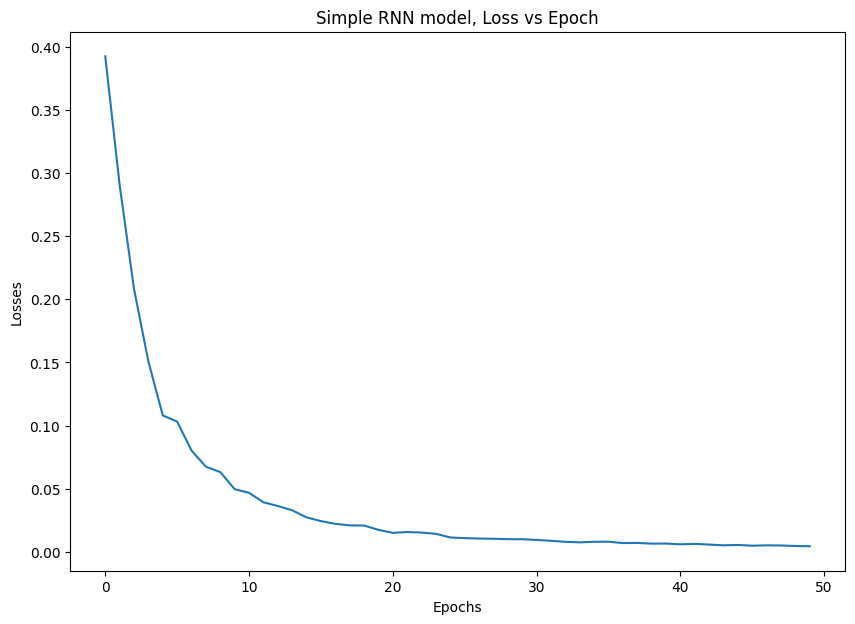

In [ ]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

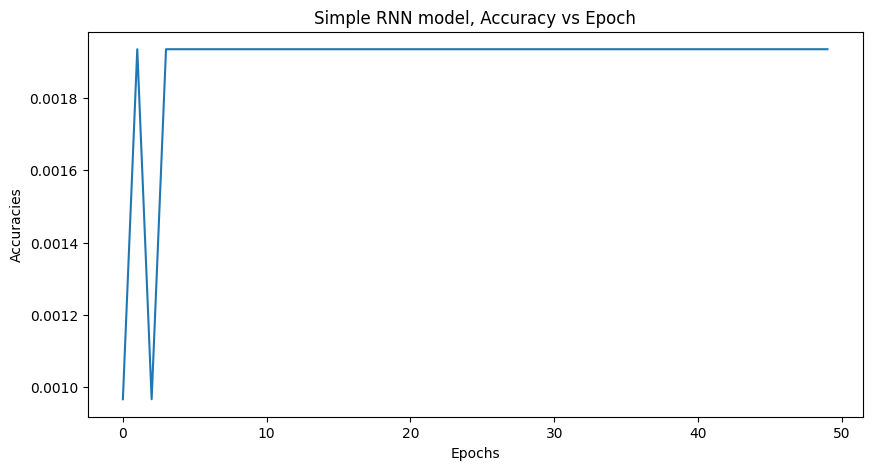

In [ ]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()



**Model predictions for train data**

In [ ]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

33/33 [==============================] - 1s 12ms/step


(1034, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1034, 1)

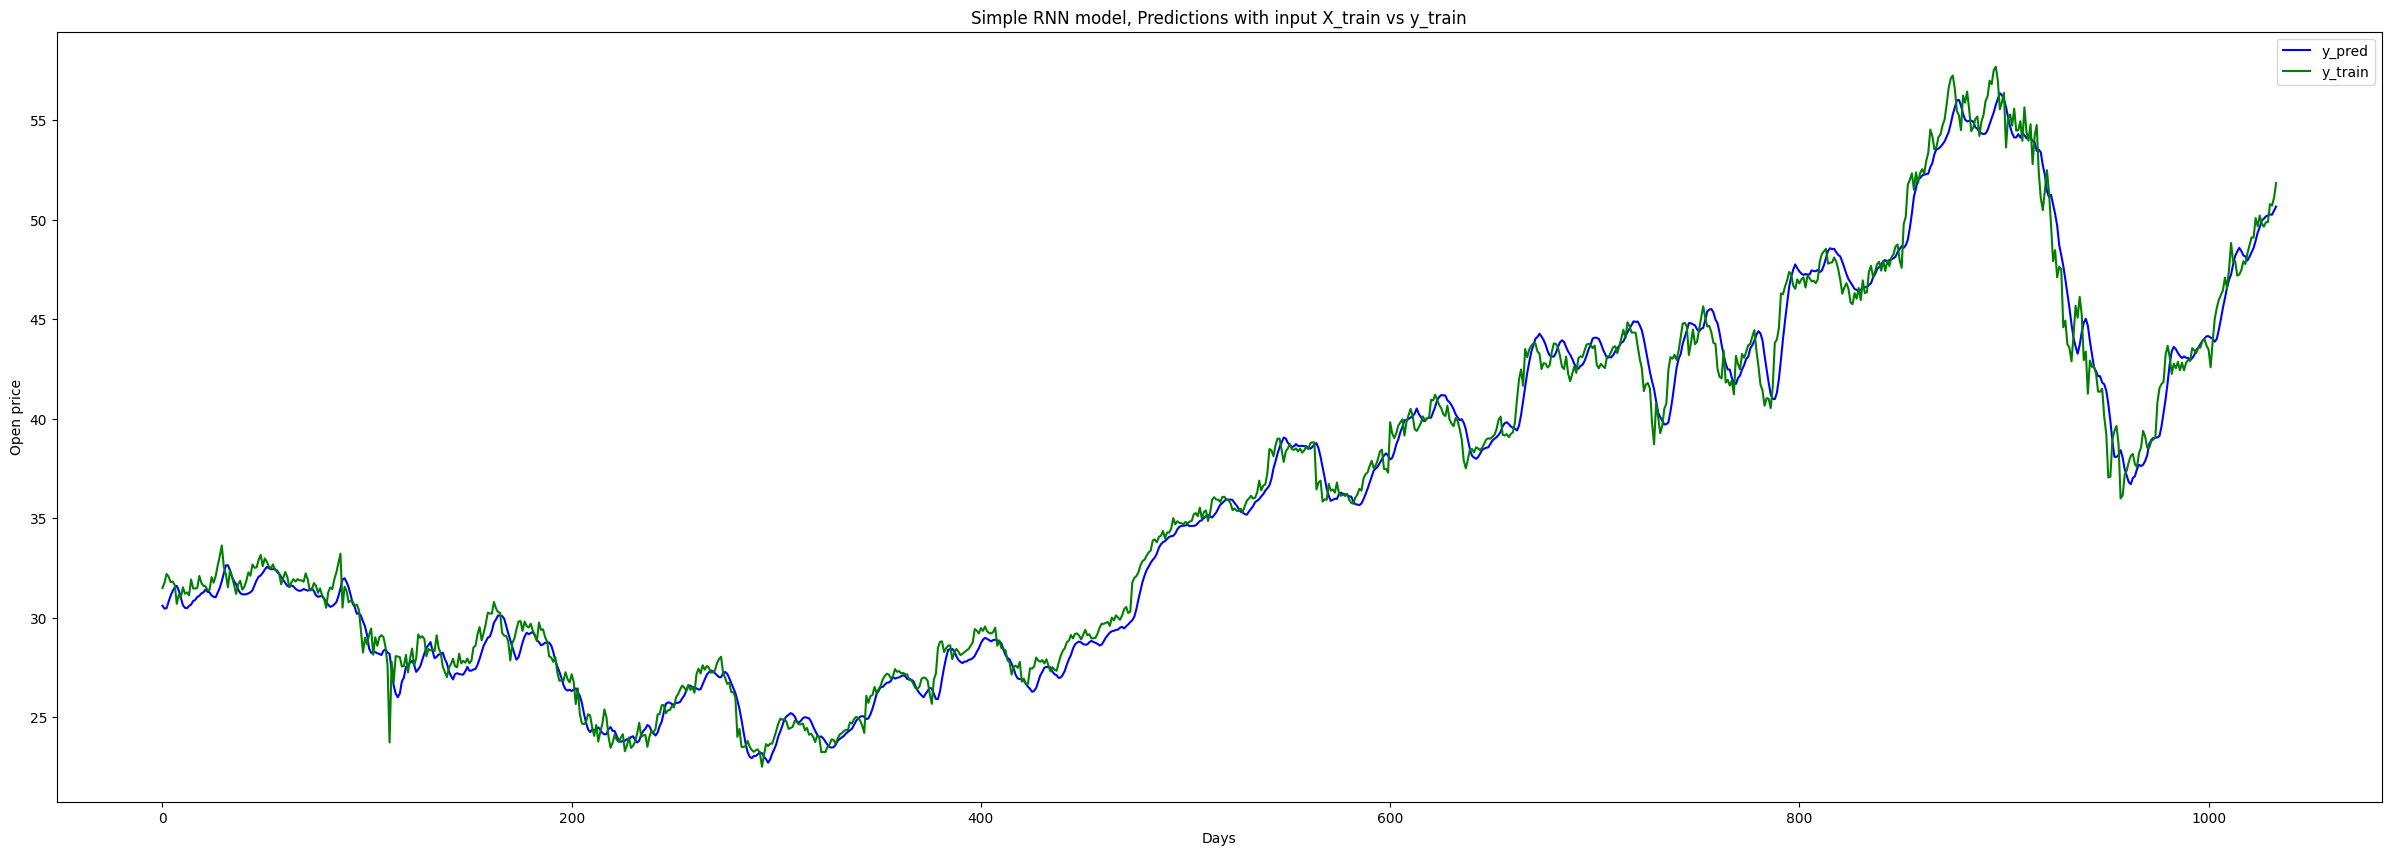

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

**8.Creating Test Dataset from Validation Data**

In [ ]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (465, 1)


In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (415, 50)
Shape of y_test before reshape : (415,)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (415, 50, 1)
Shape of y_test after reshape : (415, 1)





**9.Evaluating with Validation Data**

In [ ]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

13/13 [==============================] - 0s 12ms/step
Shape of y_pred_of_test : (415, 1)


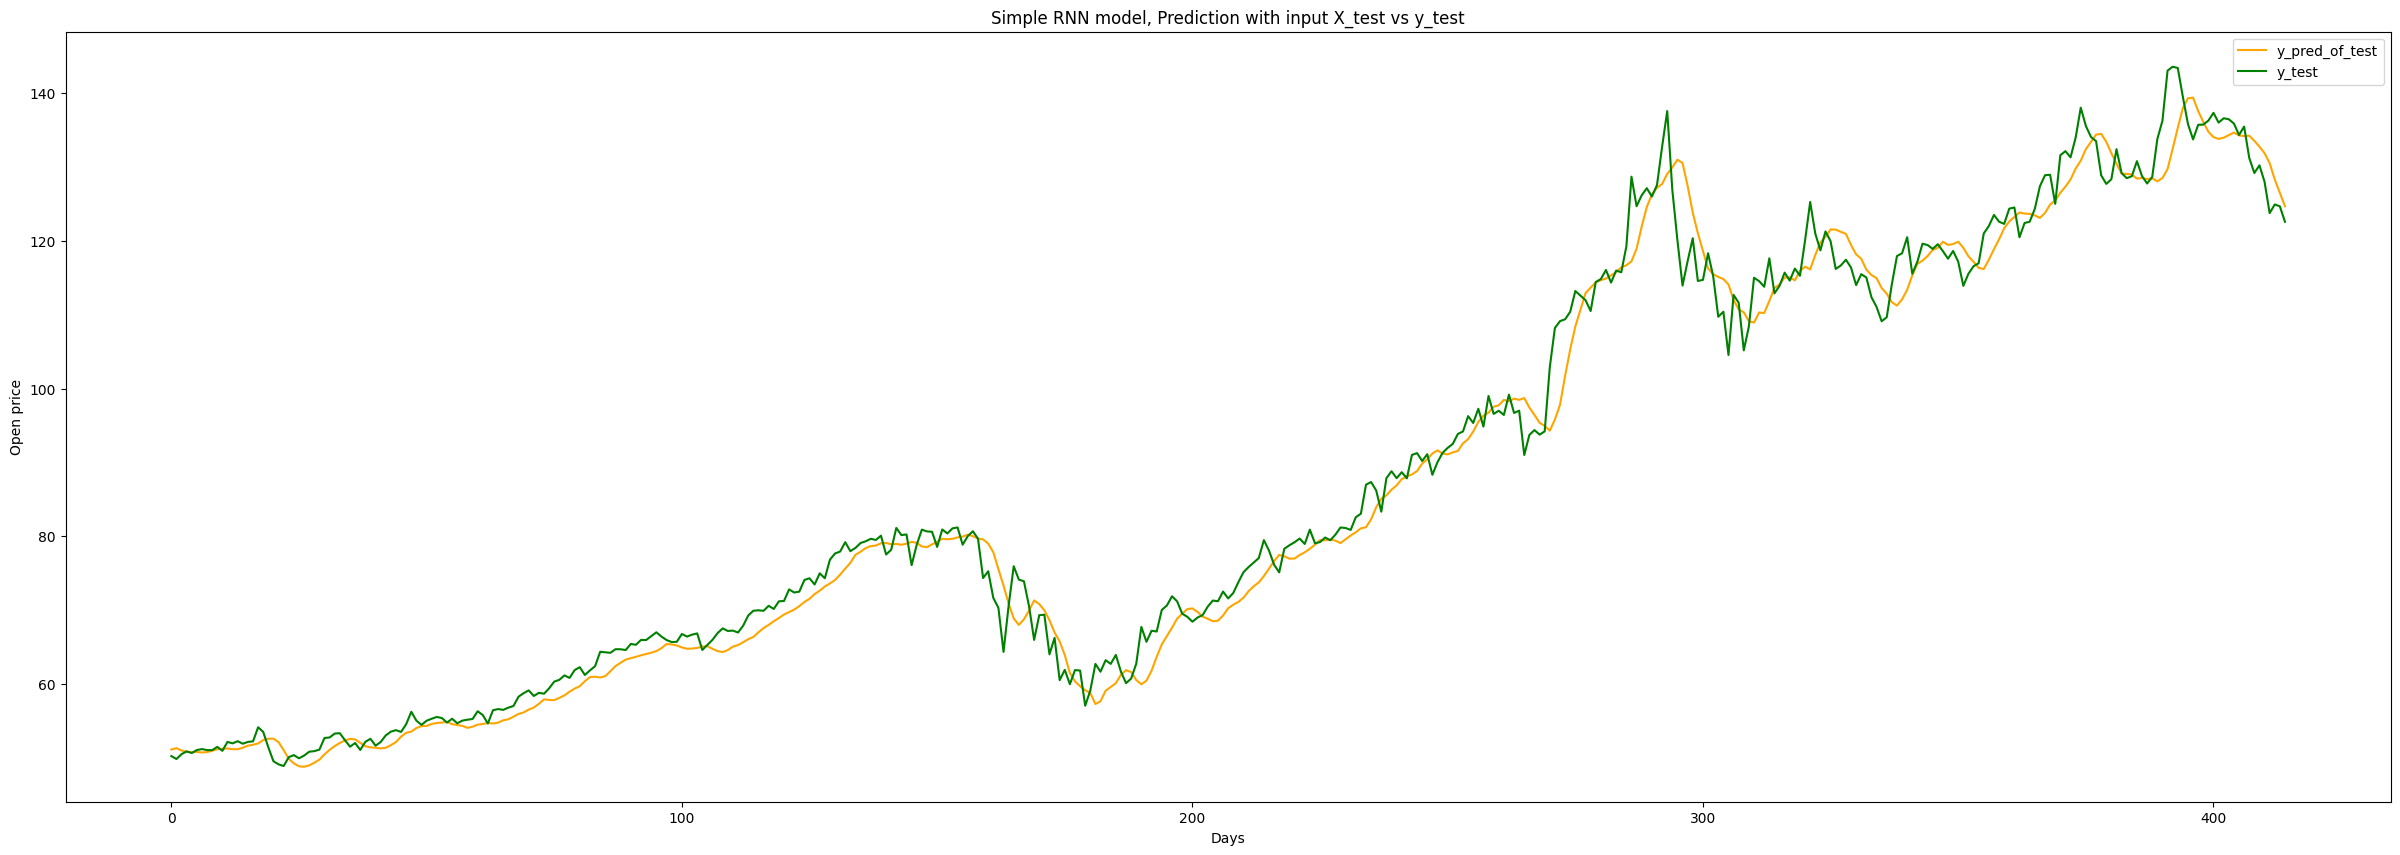

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

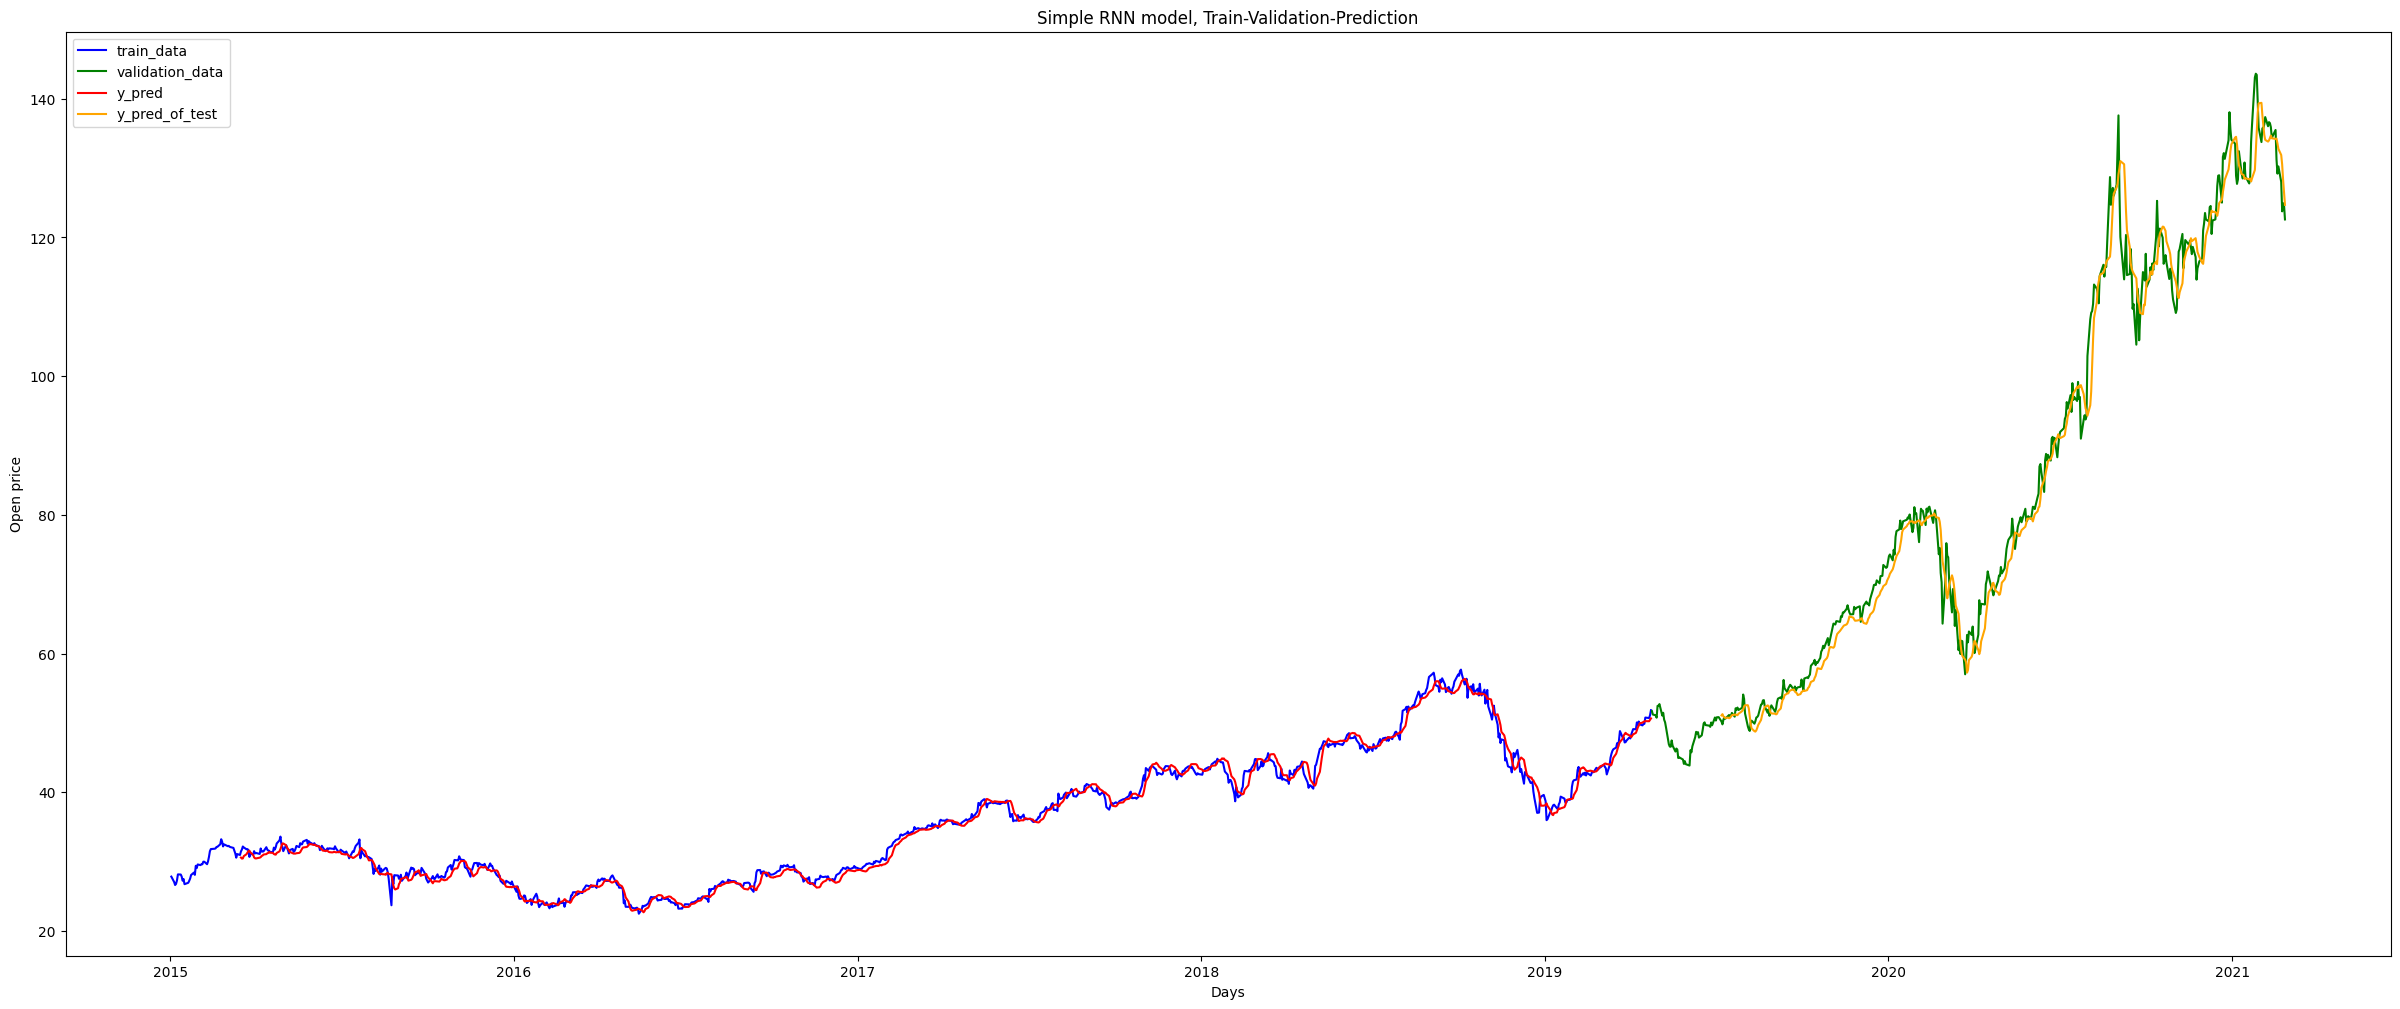

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()




**10.Creating LSTM Model**

In [ ]:
y_train = scaler.fit_transform(y_train)

In [ ]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
      LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
104/104 [==============================] - 8s 37ms/step - loss: 0.0061 - accuracy: 0.0019
Epoch 2/10
104/104 [==============================] - 5s 51ms/step - loss: 0.0013 - accuracy: 0.0019
Epoch 3/10
104/104 [==============================] - 4s 38ms/step - loss: 0.0015 - accuracy: 0.0019
Epoch 4/10
104/104 [==============================] - 4s 39ms/step - loss: 0.0011 - accuracy: 0.0019
Epoch 5/10
104/104 [==============================] - 5s 49ms/step - loss: 9.3115e-04 - accuracy: 0.0019
Epoch 6/10
104/104 [==============================] - 4s 40ms/step - loss: 7.7539e-04 - accuracy: 0.0019
Epoch 7/10
104/104 [==============================] - 4s 39ms/step - loss: 8.7088e-04 - accuracy: 0.0019
Epoch 8/10
104/104 [==============================] - 5s 49ms/step - loss: 7.7037e-04 - accuracy: 0.0019
Epoch 9/10
104/104 [==============================] - 4s 43ms/step - loss: 6.9006e-04 - accuracy: 0.0019
Epoch 10/10
104/104 [==============================] - 4s 38ms/step - l




**11.Evaluating LSTM Model**

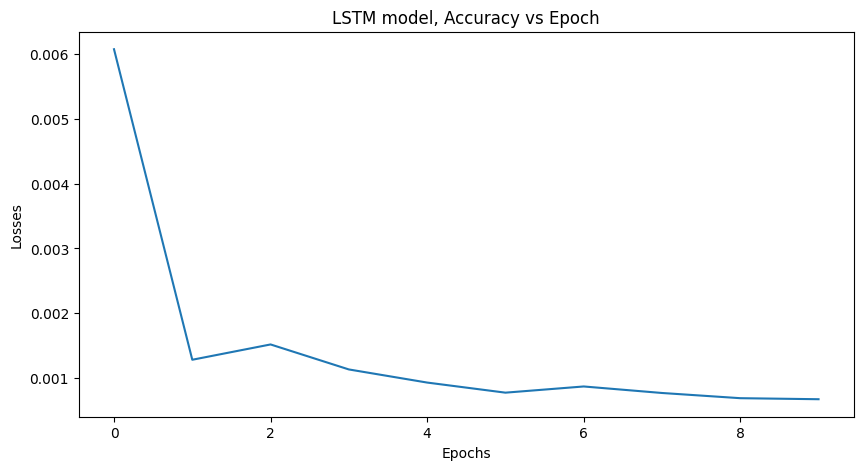

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

13/13 [==============================] - 1s 15ms/step


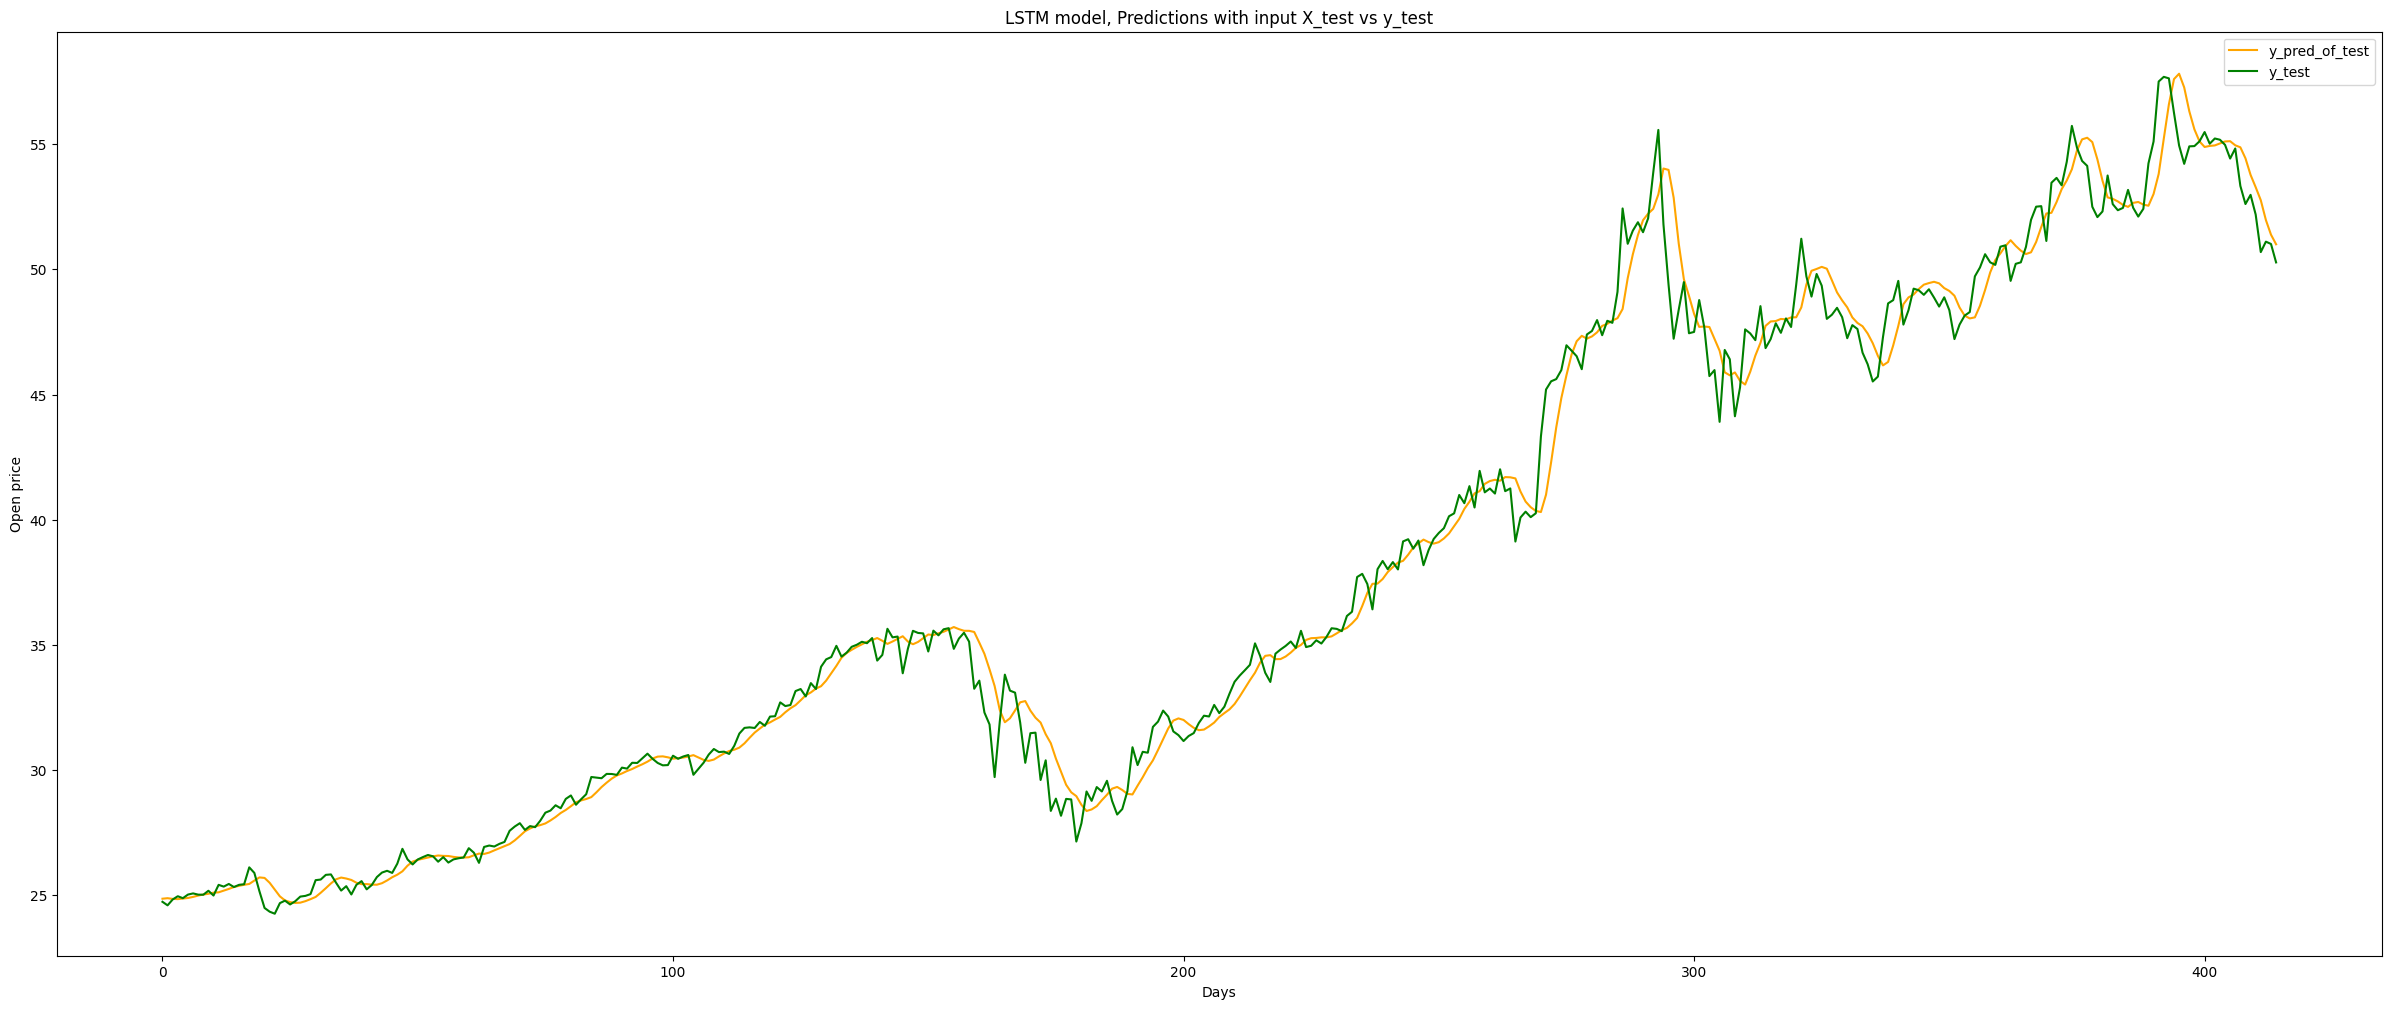

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

**12.Future price prediction**

In [ ]:
data.iloc[-1]

Date           2021-02-26
Open               122.59
High               124.85
Low                 121.2
Close              121.26
Adj. Close         121.26
Volume        164320000.0
Name: 1548, dtype: object

In [ ]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.08329367],
        [0.22941456],
        [0.30033317],
        [0.30318896],
        [0.11565921],
        [0.42931937],
        [0.45549738],
        [0.41551642],
        [0.54259876],
        [0.73584008],
        [0.61827701],
        [0.54688244],
        [0.52022846],
        [0.29985721],
        [0.24416944],
        [0.27463113],
        [0.46834841],
        [0.31413613],
        [0.28129462],
        [0.29366968],
        [0.3907663 ],
        [0.29462161],
        [0.24702523],
        [0.28891004],
        [0.53355545],
        [0.65159448],
        [0.97477392],
        [1.        ],
        [0.99190861],
        [0.80580676],
        [0.63017611],
        [0.53117563],
        [0.62541647],
        [0.62684436],
        [0.65254641],
        [0.70252261],
        [0.63969538],
        [0.66777725],
        [0.66111376],
        [0.63350785],
        [0.55973346],
        [0.61399334],
        [0.41218467],
        [0.31461209],
        [0.36411233],
        [0

In [ ]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 2021-02-27     :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 2021-02-27 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 30ms/step
Simple RNN, Open price prediction for 2021-02-27     : 123.80336
LSTM prediction, Open price prediction for 2021-02-27 : 124.96568
